In [ ]:
import os
import json
# change to results folder
os.environ['nnUNet_results'] = f'/home/nathan/segmentation_generator/'
os.environ['nnUNet_preprocessed'] = 'none'
os.environ['nnUNet_raw'] = 'none'

from nnunetv2.inference.predict_from_raw_data import predict_entry_point, predict_using_numpy

In [ ]:
# load properties (can be an empty json file)
with open('properties.json', 'r') as f:
    properties = json.load(f)

In [ ]:
import SimpleITK as sitk
import numpy as np
input = sitk.GetArrayFromImage(sitk.ReadImage("/raid/dataset/nnUNet_raw/Dataset022_COPD_addedArt/imagesTr/26173V_16_2_data_0000.nii.gz"))
true_mask = sitk.GetArrayFromImage(sitk.ReadImage("/raid/dataset/nnUNet_raw/Dataset022_COPD_addedArt/labelsTr/26173V_16_2_data.nii.gz"))
image_1 = np.expand_dims(input, axis=0)
# testing with images of different sizes
image_2 = sitk.GetArrayFromImage(sitk.ReadImage("/raid/dataset/nnUNet_raw/Dataset022_COPD_addedArt/imagesTr/26159B_4_2_data_0000.nii.gz"))
image_2 = np.expand_dims(image_2, axis=0)
input = [image_1, image_2]

predictor = predict_using_numpy(input, '022', properties, c='3d_fullres', npp=2, nps=1, f = [0], chk ='checkpoint_best.pth')

In [ ]:
# grab masks
masks = predictor.grab_masks()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image_1[0][:, 100, :], cmap='gray', )
plt.imshow(masks[0][:, 100, :], cmap='Reds', alpha=masks[0][:, 100, :]*.5)
plt.imshow(true_mask[:, 100, :], cmap='Greens', alpha=true_mask[:, 100, :]*.5)
plt.show()
print(image_1.shape)

In [8]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from SwinUNeTRGen import SwinUNETRMaskGen
import torch

generator = SwinUNETRMaskGen("/home/nathan/Desktop/SWINUNETR_ARTF/4DCT_ONLY_2_Torch/fold_4DCT_2_unified_focal_g030_SGD/checkpoint_best.pt", device='cuda:0')

# load images, masks, and roi
img = torch.load("/raid/4DCT_ONLY_2_Torch/imagesTs/114_0_4_2_1_0000.pt")
mask = torch.load("/raid/4DCT_ONLY_2_Torch/labelsTs/114_0_4_2_1.pt")
roi = torch.load("/raid/4DCT_ONLY_2_Torch/roiTs/114_0_4_2_1.pt")

# generate masks
output = generator(img, mask, roi)

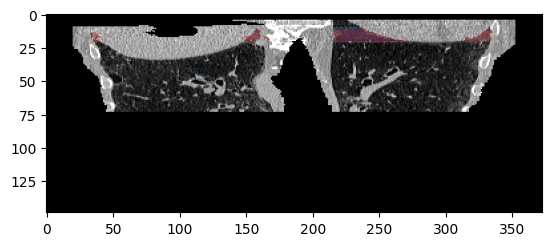

In [10]:
import matplotlib.pyplot as plt

plt.imshow(img[:, 100, :], cmap='gray')
plt.imshow(output[:, 100, :], alpha=output[:, 100, :]*.5, cmap='Blues')
plt.imshow(mask[:, 100, :], cmap='Reds', alpha=mask[:, 100, :]*.5)